Lecture 20. eigenface - Add data preprocessing

In [9]:
!pip install dlib
# !pip uninstall -y opencv-python opencv-python-headless numpy
# !pip install numpy opencv-python-headless --upgrade
!pip install imutils
!pip install scikit-learn

import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import dlib
import cv2
from imutils import face_utils

--2025-05-14 07:53:52--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-05-14 07:53:53--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  39.9MB/s    in 1.5s    

2025-05-14 07:53:54 (39.9 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


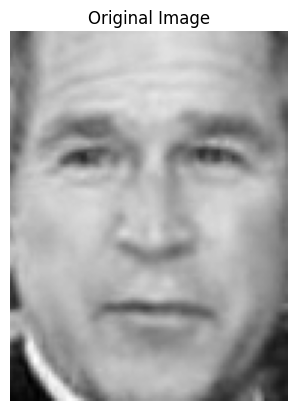

In [10]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

lfw_people = fetch_lfw_people(min_faces_per_person=500, resize=1.0)
images = lfw_people.images

image = images[0]
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

[20 44]
[75 44]
[ 49 101]


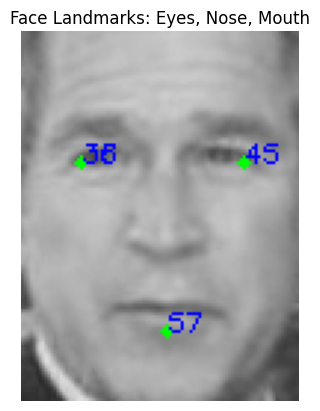

In [11]:
image = images[0]
image = image*255
image = image.astype(np.uint8)

faces = detector(image)

face = faces[0]
shape = predictor(image, face)
landmarks = face_utils.shape_to_np(shape)
print(landmarks[36])
print(landmarks[45])
print(landmarks[57])

image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for (i, (x, y)) in enumerate(landmarks):
    if i in [36, 45, 57]:  # 눈, 코, 입
        cv2.circle(image_color, (x, y), 2, (0, 255, 0), -1)
        cv2.putText(image_color, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)

plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
plt.title("Face Landmarks: Eyes, Nose, Mouth")
plt.axis('off')
plt.show()

In [12]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.utils import Bunch
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
from PIL import Image

data = fetch_lfw_people(min_faces_per_person=30, resize=1)
images = data.images

X = data.data         # shape: (n_samples, h*w)
images = data.images  # shape: (n_samples, h, w)
target = data.target  # 라벨
names = data.target_names

# random 1000 datasamples
np.random.seed(1)
indices = np.random.choice(len(X), size=1000, replace=False)

data = Bunch(
    data = data.data[indices],
    images = data.images[indices],
    target = data.target[indices],
    target_names = data.target_names
)

In [6]:
image = data.images[14]
image = image*255
image = image.astype(np.uint8)

faces = detector(image)
face = faces[0]
shape = predictor(image, face)
landmarks = face_utils.shape_to_np(shape)

x36,y36 = landmarks[36]
x45, y45 = landmarks[45]
x57, y57 = landmarks[57]


##### todo

theta = @@@@
x_center = @@@@
y_center = @@@@
scale = @@@@
#######

img = Image.fromarray(image, mode='L')
transformed = TF.affine(img, angle=np.degrees(-theta), translate=[0, 0], scale=1.0, shear=[0, 0])
transformed = TF.affine(transformed, angle=0, translate=[x_center, y_center], scale=1, shear=[0, 0])
transformed = TF.affine(transformed, angle=0, translate=[0, 0], scale=60/dx, shear=[0, 0])

print(transformed)

########## tuning if you want
box = (10, 15, 84, 110)
transformed2 = transformed.crop(box)
##########

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed2, cmap='gray')
plt.title("Affine Transformed")
plt.axis('off')
plt.show()

SyntaxError: invalid syntax (<ipython-input-6-ddae309f1bd9>, line 17)

In [7]:
images = []
images_flat = []
targets = []

for i in range(len(data.data)):
  image = data.images[i]
  image = image*255
  image = image.astype(np.uint8)

  faces = detector(image)
  if len(faces) == 0:
    continue
  face = faces[0]
  shape = predictor(image, face)
  landmarks = face_utils.shape_to_np(shape)

  x36,y36 = landmarks[36]
  x45, y45 = landmarks[45]
  x57, y57 = landmarks[57]

########## same code
  theta = @@@@
  x_center = @@@@
  y_center = @@@@
  scale = @@@@

##########

  img = Image.fromarray(image, mode='L')

  transformed = TF.affine(img, angle=np.degrees(-theta), translate=[0, 0], scale=1.0, shear=[0, 0])
  transformed = TF.affine(transformed, angle=0, translate=[x_center, y_center], scale=1, shear=[0, 0])
  transformed = TF.affine(transformed, angle=0, translate=[0, 0], scale=60/dx, shear=[0, 0])


##########
  box = (10, 15, 84, 110)
  transformed2 = transformed.crop(box)
##########

  images.append(np.array(transformed2))
  images_flat.append(np.array(transformed2).flatten())
  targets.append(data.target[i])

images = np.stack(images)
images_flat = np.stack(images_flat)

data2 = Bunch(
    data = images_flat/255,
    images = images/255,
    target = np.array(targets),
    target_names = data.target_names
)



SyntaxError: invalid syntax (<ipython-input-7-7fbe5b73d2e8>, line 22)

In [8]:
n_samples, h, w = images.shape
X = data2.data

mean_face_flat = np.mean(X, axis=0)
X_centered = X - mean_face_flat

mean_face = mean_face_flat.reshape(h, w)
centered_example = X_centered[0].reshape(h, w)

plt.figure(figsize=(6, 4))
plt.imshow(mean_face, cmap='gray')
plt.title("Mean Face")
plt.axis('off')
plt.tight_layout()
plt.show()

NameError: name 'data2' is not defined

In [ ]:
n_samples, h, w = images.shape
X = data2.data

mean_face_flat = np.mean(X, axis=0)
X_centered = X - mean_face_flat

U, S, VT = np.linalg.svd(X_centered, full_matrices=False)

weights_pc1 = U[:, 0] * S[0]
weights_pc2 = U[:, 1] * S[1]

print(f"S[0]: {S[0]:.2f}, 가중치[0] 범위: {weights_pc1.min():.2f} ~ {weights_pc1.max():.2f}")
print(f"S[1]: {S[1]:.2f}, 가중치[1] 범위: {weights_pc2.min():.2f} ~ {weights_pc2.max():.2f}")

S[0]: 221.83, 가중치[0] 범위: -18.97 ~ 23.39
S[1]: 129.44, 가중치[1] 범위: -16.84 ~ 15.31


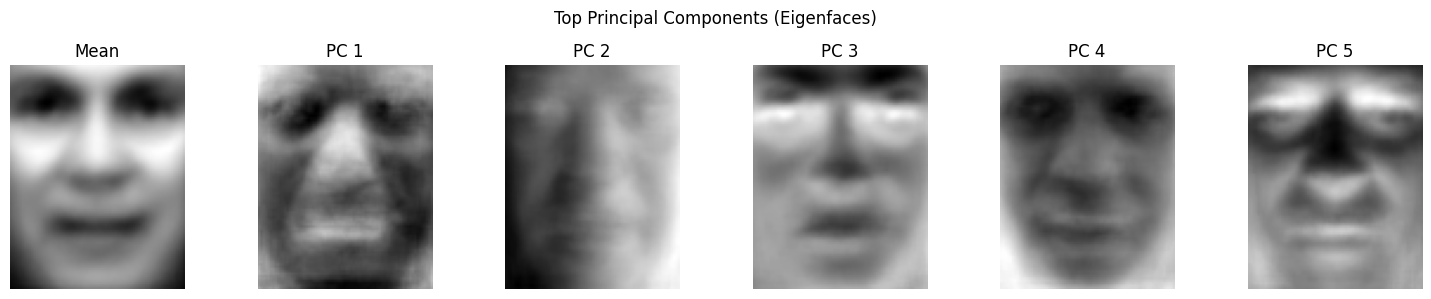

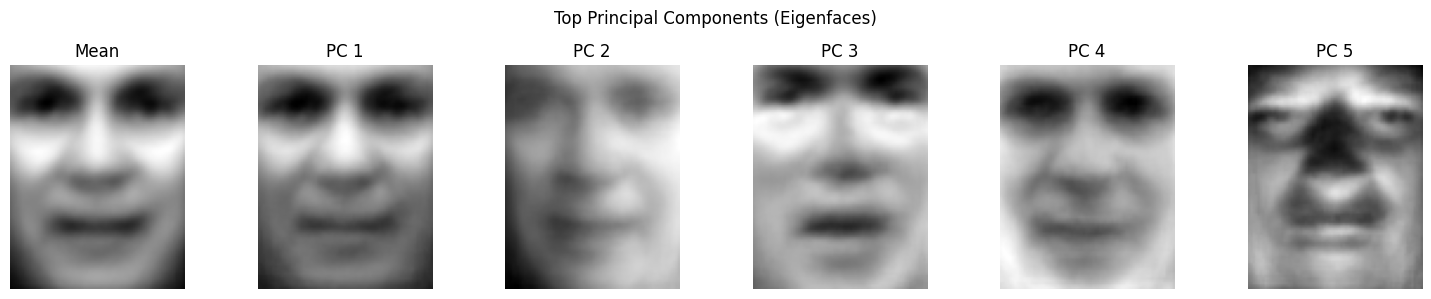

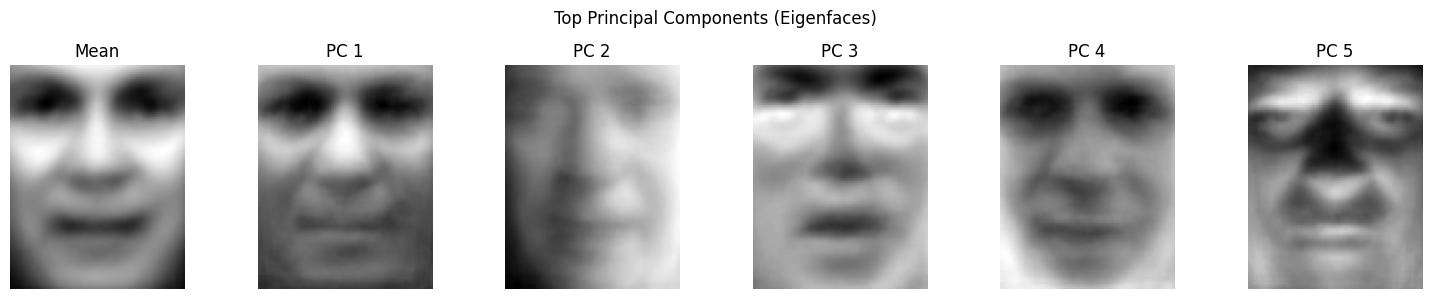

In [ ]:
# ----------------------------
fig, axes = plt.subplots(1, 6, figsize=(15, 3))

# mean face
axes[0].imshow(mean_face, cmap='gray')
axes[0].set_title("Mean")
axes[0].axis('off')

k = 5  # 상위 주성분 개수
eigenfaces = VT[:k].reshape((k, h, w))

for i in range(k):
    ax = axes[i+1]
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')

plt.suptitle("Top Principal Components (Eigenfaces)")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 6, figsize=(15, 3))

####
axes[0].imshow(mean_face, cmap='gray')
axes[0].set_title("Mean")
axes[0].axis('off')

for i in range(k):
    ax = axes[i+1]
    ax.imshow(10*eigenfaces[i]+mean_face, cmap='gray')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')

plt.suptitle("Top Principal Components (Eigenfaces)")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 6, figsize=(15, 3))
####
axes[0].imshow(mean_face, cmap='gray')
axes[0].set_title("Mean")
axes[0].axis('off')

for i in range(k):
    ax = axes[i+1]
    ax.imshow(20*eigenfaces[i]+mean_face, cmap='gray')
    ax.set_title(f"PC {i+1}")
    ax.axis('off')

plt.suptitle("Top Principal Components (Eigenfaces)")
plt.tight_layout()
plt.show()

In [ ]:
n_principal = 50
features = X_centered@VT[:n_principal, :].T
recon = features @ VT[:n_principal, :] + mean_face_flat
print(recon[0])

[0.62119048 0.60202453 0.58340443 ... 0.43890753 0.44964875 0.42709237]


[[0.43921569 0.44313725 0.44313725 ... 0.52156863 0.51372549 0.50980392]
 [0.4745098  0.49803922 0.46666667 ... 0.50980392 0.49803922 0.49411765]
 [0.51764706 0.55686275 0.5254902  ... 0.50980392 0.49803922 0.49411765]
 ...
 [0.46666667 0.46666667 0.45882353 ... 0.57647059 0.58823529 0.56470588]
 [0.45490196 0.45098039 0.45882353 ... 0.57647059 0.58431373 0.56470588]
 [0.44313725 0.45490196 0.44313725 ... 0.56862745 0.57647059 0.56470588]]


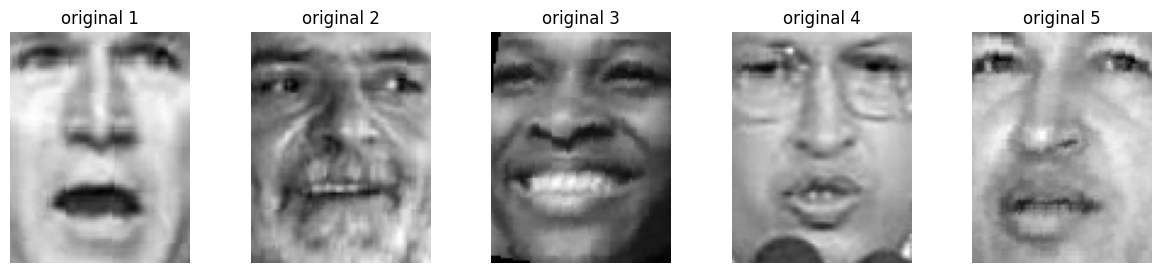

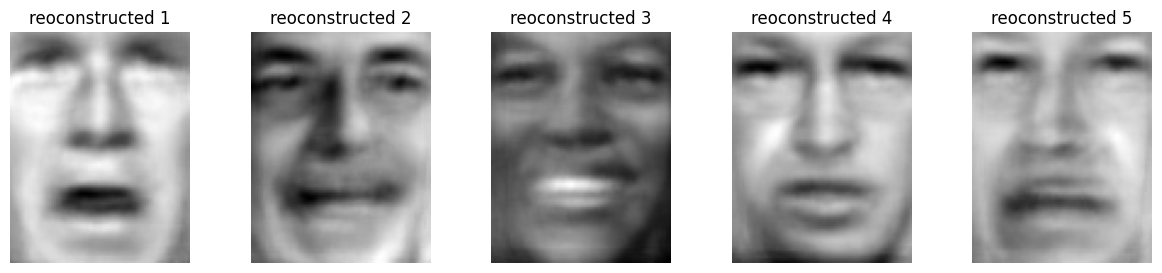

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

print(X[i].reshape(h,w))
for i in range(5):
    ax = axes[i]
    ax.imshow(X[i].reshape(h,w), cmap='gray')
    ax.set_title(f"original {i+1}")
    ax.axis('off')
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    ax = axes[i]
    ax.imshow(recon[i].reshape(h,w), cmap='gray')
    ax.set_title(f"reoconstructed {i+1}")
    ax.axis('off')

plt.show()

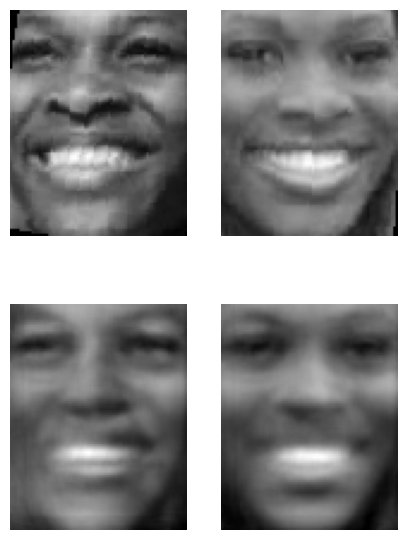

In [ ]:
index = 2

z = X_centered[index, :]@VT[:n_principal, :].T

def find_nearest_index(X_features, z_query):
    distances = np.linalg.norm(X_features - z_query, axis=1)
    sorted_indices = np.argsort(distances)
    second_idx = sorted_indices[1]
    return second_idx, distances[second_idx]

nearest_idx, dist = find_nearest_index(features, z)

fig, axes = plt.subplots(2, 2, figsize=(5, 7))

ax = axes[0, 0]
ax.imshow(X[index].reshape(h,w), cmap='gray')
ax.axis('off')

ax = axes[0, 1]
ax.imshow(X[nearest_idx].reshape(h,w), cmap='gray')
ax.axis('off')

ax = axes[1, 0]
ax.imshow(recon[index].reshape(h,w), cmap='gray')
ax.axis('off')

ax = axes[1,1]
ax.imshow(recon[nearest_idx].reshape(h,w), cmap='gray')
ax.axis('off')
plt.show()